In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


# Prepare data

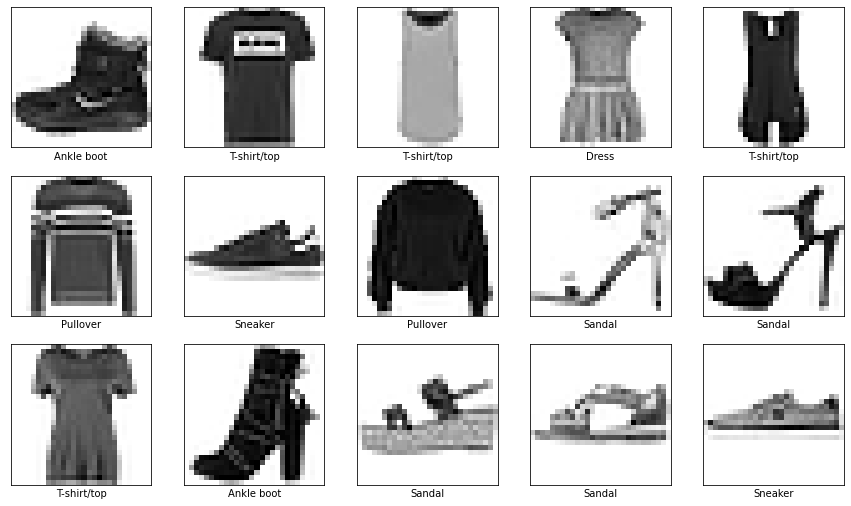

In [2]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', \
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
   
def prepare_data(train, test):
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    return train_norm, test_norm

(X_train, Y_train), (X_test, y) = fashion_mnist.load_data()

#plot data
plt.figure(figsize=(15,15))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[Y_train[i]])
plt.show()

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
Y_train = to_categorical(Y_train)
Y_test = to_categorical(y)

X_train, X_test = prepare_data(X_train, X_test)

# create model

In [4]:
def get_model():
    model = Sequential()
    model.add(Conv2D(filters=64,kernel_size=(2, 2),padding='same',activation='relu',input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
    model.add(Conv2D(filters=32,kernel_size=(2, 2),padding='same',activation='relu',input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=256,activation='relu'))
    model.add(Dense(units=10,activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model1 = get_model()
model1.summary()
history = model1.fit(X_train, Y_train, batch_size=256, epochs=10, validation_split=0.2, verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               401664    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

# predict

In [6]:
predicted_classes1 = model1.predict_classes(X_test)
print(classification_report(y, predicted_classes1, target_names=classes))

/home/rgegotek/anaconda3/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

 T-shirt/top       0.84      0.89      0.87      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.87      0.87      0.87      1000
       Dress       0.89      0.92      0.91      1000
        Coat       0.82      0.89      0.85      1000
      Sandal       0.99      0.96      0.97      1000
       Shirt       0.81      0.67      0.73      1000
     Sneaker       0.93      0.98      0.95      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Corrected predicted classes: 9097 on 10000 classes


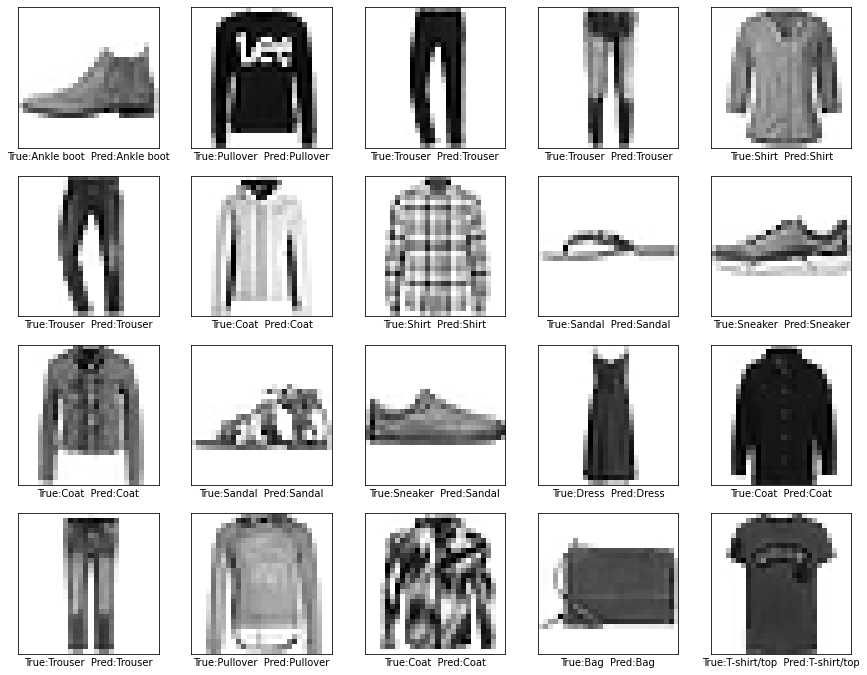

In [12]:
correct = np.nonzero(predicted_classes1==y)[0]
print("Corrected predicted classes:",correct.shape[0], "on", len(predicted_classes1), "classes")

plt.figure(figsize=(15,15))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel("True:{}  Pred:{}".format(classes[y[i]],classes[predicted_classes1[i]]))
plt.show()

# Implementing a max-pooling layer

In [15]:
def pooling(A_prev, f, stride, mode):
    H_prev, W_prev, C_prev = A_prev.shape
      
    H = int(1 + (H_prev - f) / stride)
    W = int(1 + (W_prev - f) / stride)
    C = C_prev
    A = np.zeros((H, W, C))              
    
    for h in range(H):
        for w in range(W):
            for c in range(C):
                y_start = h * stride
                y_end   = y_start + f
                x_start = w * stride
                x_end   = x_start + f
                a_slice = A_prev[y_start:y_end, x_start:x_end, c]
                if mode == "max":
                    A[h, w, c] = np.max(a_slice)
                elif mode == "average":
                    A[h, w, c] = np.mean(a_slice)
    return A

In [24]:
np.random.seed(1)
A_prev = np.random.randn(4, 4, 3)
A = pooling(A_prev, stride=2, f=3)
print("mode = max")
print("A shape =", A.shape)
print("A_prev shape =", A_prev.shape)

mode = max
A_prev shape = (4, 4, 3)
A shape = (1, 1, 3)


In [26]:
A = pooling(A_prev, stride=2, f=3, mode="average")
print("mode = average")
print("A shape =", A.shape)
print("A_prev shape =", A_prev.shape)

mode = average
A shape = (1, 1, 3)
A_prev shape = (4, 4, 3)


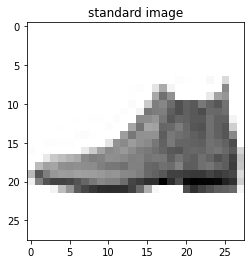

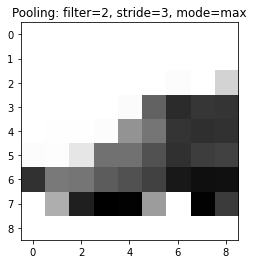

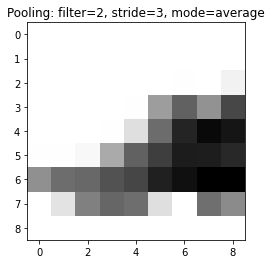

In [23]:
x = np.array(X_test[0])
plt.imshow(x, cmap=plt.cm.binary)
plt.title("standard image")
plt.show()

x1 = pooling(x, 2, 3, "max")
plt.imshow(x1, cmap=plt.cm.binary)
plt.title("Pooling: filter=2, stride=3, mode=max")
plt.show()

x2 = pooling(x, 2, 3, 'average')
plt.imshow(x2, cmap=plt.cm.binary)
plt.title("Pooling: filter=2, stride=3, mode=average")
plt.show()